<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Regression/Concrete_Compressive_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

## Import Packages



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('drive/MyDrive/Fusion')

In [ ]:
!ls

 50_Startups.csv	   diabetes_null.csv   slr02.xlsx
 boston.csv		   Insurance.xlsx      Social_Network_Ads.csv
'Concrete_Data (4).xlsx'   Salary_Data.csv     unprocessed_data.csv


In [ ]:
df = pd.read_excel('Concrete_Data (4).xlsx', engine='openpyxl')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### Rename the Columns

In [ ]:
col = {'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast Furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash ',
       'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
       'Age (day)': 'Age',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
       'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength'}

In [ ]:
df.rename(columns=col,
          inplace=True)

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075



# Data Visualization 



<Figure size 720x720 with 0 Axes>

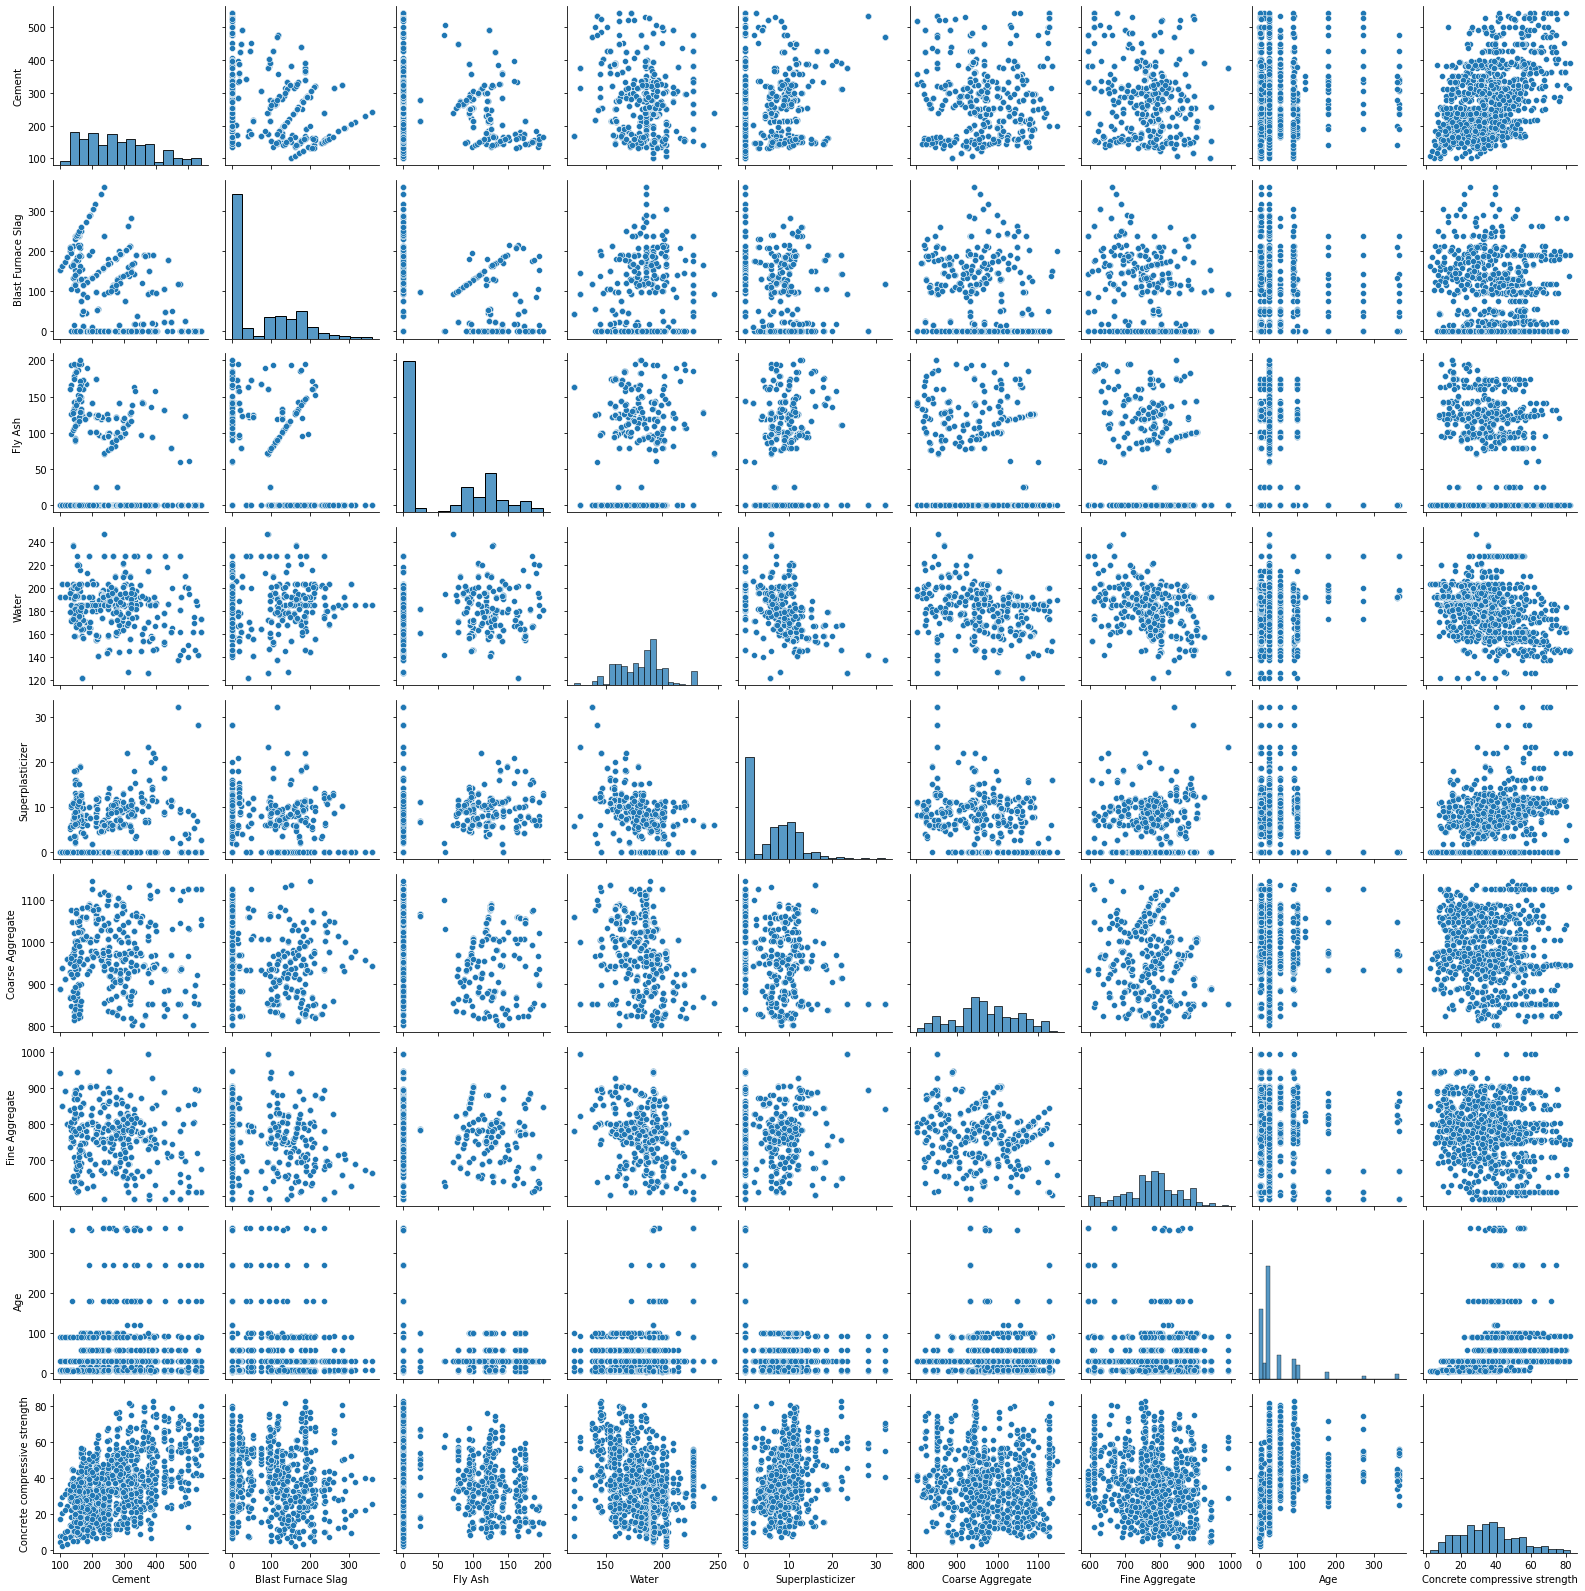

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

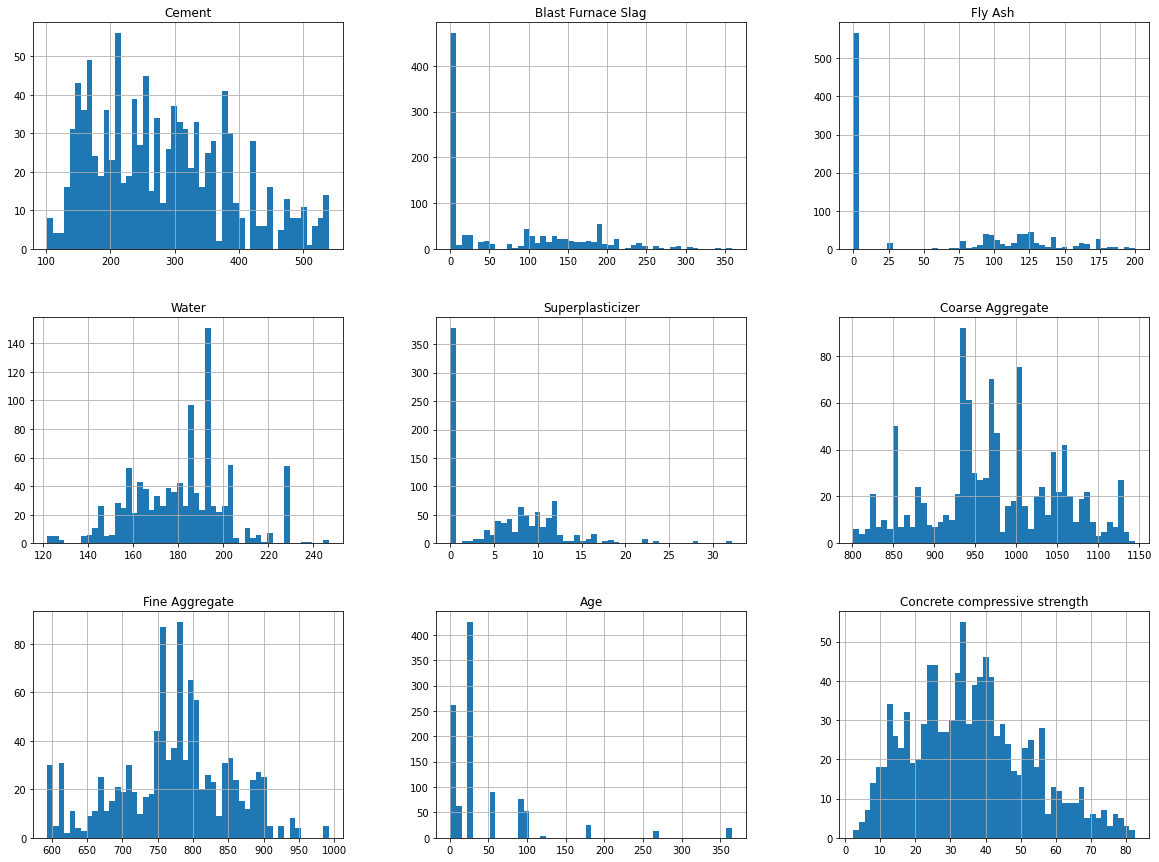

In [ ]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

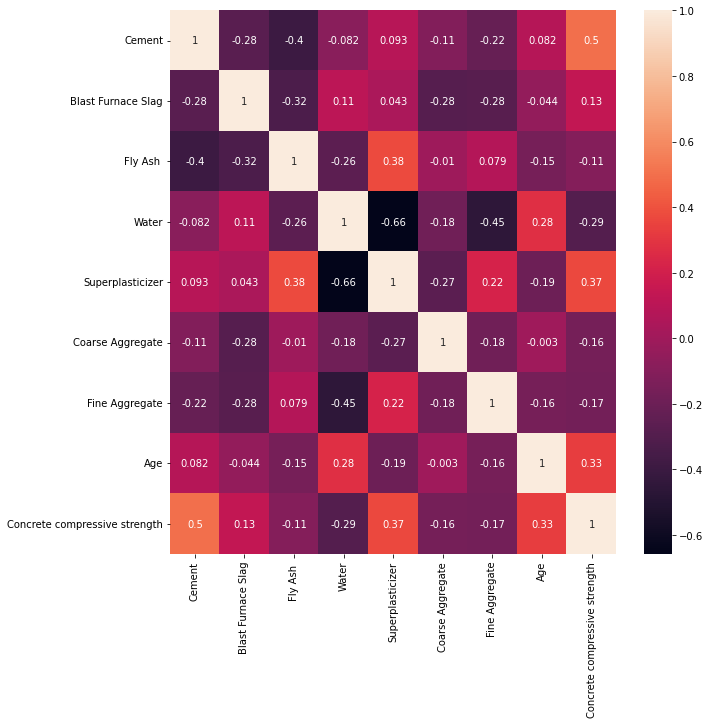

In [ ]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

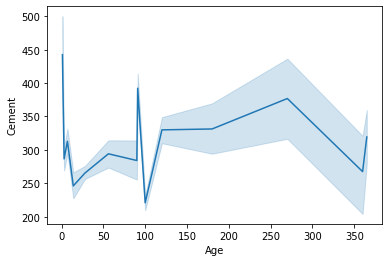

In [ ]:
sns.lineplot(data=df,x='Age', y='Cement')

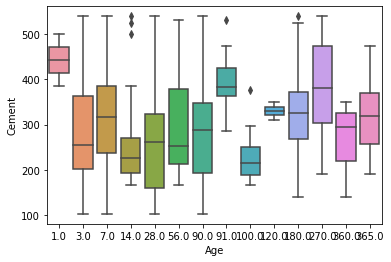

In [ ]:
sns.boxplot(data=df,x='Age', y='Cement')

# Data Cleaning


### Remove unnecessary columns

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash ', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [ ]:
df.drop(['Fly Ash ','Water','Coarse Aggregate', 'Fine Aggregate'],axis=1,inplace=True)

In [ ]:
df.corr()

,Cement,Blast Furnace Slag,Superplasticizer,Age,Concrete compressive strength
Cement,1.000000,-0.275193,0.092771,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,0.043376,-0.044246,0.134824
Superplasticizer,0.092771,0.043376,1.000000,-0.192717,0.366102
Age,0.081947,-0.044246,-0.192717,1.000000,0.328877
Concrete compressive strength,0.497833,0.134824,0.366102,0.328877,1.000000


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Superplasticizer,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,6.203112,45.662136,35.817836
std,104.507142,86.279104,5.973492,63.169912,16.705679
min,102.000000,0.000000,0.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,7.000000,23.707115
50%,272.900000,22.000000,6.350000,28.000000,34.442774
75%,350.000000,142.950000,10.160000,56.000000,46.136287
max,540.000000,359.400000,32.200000,365.000000,82.599225


### Check for Missing Data

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

Cement                           0
Blast Furnace Slag               0
Superplasticizer                 0
Age                              0
Concrete compressive strength    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Superplasticizer               1030 non-null   float64
 3   Age                            1030 non-null   float64
 4   Concrete compressive strength  1030 non-null   float64
dtypes: float64(5)
memory usage: 40.4 KB


In [ ]:
df.shape

(1030, 5)

### Synthetic Minority Over-Sampling Technique for Regression

In [ ]:
# !pip install smogn

In [ ]:
import smogn
df_smogn = smogn.smoter(
    data=df,
    y='Concrete compressive strength',
    k=9,
    samp_method = 'extreme',
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 1
)

r_index: 100%|##########| 74/74 [00:00<00:00, 696.70it/s]


In [ ]:
df_smogn.shape

(1754, 5)

In [ ]:
X_res = df_smogn.drop('Concrete compressive strength',axis=1)
y_res = df_smogn['Concrete compressive strength'].values

print(f' X_shape: {X_res.shape} \n y_shape: {y_res.shape}')

 X_shape: (1754, 4) 
 y_shape: (1754,)


In [ ]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength'].values

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (1030, 4) 
 y_shape: (1030,)


## Data Scaling


In [ ]:
# Standarization
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [ ]:
# Standarization
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_res = scl.fit_transform(X_res)

In [ ]:
X.shape

(1030, 4)

In [ ]:
X_res.shape

(1754, 4)

### Split data into train and test


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (824, 4) & X_test: (206, 4)
 y_train: (824,) & y_test: (206,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (1403, 4) & X_test: (351, 4)
 y_train: (1403,) & y_test: (351,)


## Model Selection

#### RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_test = rf_reg.predict(X_test)
y_pred_train = rf_reg.predict(X_train)

rf_reg.fit(X_train_res, y_train_res)
y_pred_test_res = rf_reg.predict(X_test_res)
y_pred_train_res = rf_reg.predict(X_train_res)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('R Squared of Train befor Oversampling: {}'.format(r2_score(y_train,y_pred_train)*100))
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,y_pred_test)*100))
print('********************************************************')
print('R Squared of Train after Oversampling: {}'.format(r2_score(y_train_res,y_pred_train_res)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,y_pred_test_res)*100))

R Squared of Train befor Oversampling: 98.08285425187528
R Squared of Test  befor Oversampling: 90.60939801138659
********************************************************
R Squared of Train after Oversampling: 97.19524543109887
R Squared of Test after Oversampling: 93.50339504225815


###### Use Grid Search CV

In [ ]:
rf_reg.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters= {'n_estimators':[30,40,50,100],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[3,4,5,6,7,8,9,11],
             'max_features':['sqrt','log2']
            }

grid_search = GridSearchCV(estimator = rf_reg,        
                           param_grid = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)                

In [ ]:
rf_reg_res = RandomForestRegressor()

parameters= {'n_estimators':[30,40,50,100],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[3,4,5,6,7,8,9,11],
             'max_features':['sqrt','log2']
            }

grid_search_res = GridSearchCV(estimator = rf_reg_res,        
                           param_grid = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)  

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
print("best r2 score befor Oversampleing:" , grid_search.best_score_ * 100)
grid_search.best_params_ 

best r2 score befor Oversampleing: 87.9246213902197


{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 50}

In [ ]:
grid_search_res = grid_search_res.fit(X_train_res, y_train_res)
print("best r2 score after Oversampleing:" , grid_search_res.best_score_ * 100)
grid_search_res.best_params_ 

best r2 score after Oversampleing: 91.97071492050752


{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 100}

### Applying k-Fold Cross Validation

In [ ]:
rf_reg = grid_search.best_estimator_
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=50)

In [ ]:
rf_reg_res = grid_search_res.best_estimator_
rf_reg_res.fit(X_train_res, y_train_res)

RandomForestRegressor(max_depth=11, max_features='sqrt')

In [ ]:
from sklearn.model_selection import cross_val_score
rf_reg_results = cross_val_score(estimator = rf_reg, X = X_train, y = y_train, cv = 5)
rf_reg_results_res = cross_val_score(estimator = rf_reg_res, X = X_train_res, y = y_train_res, cv = 5)

rf_reg_pred = rf_reg.predict(X_test)
rf_reg_res_pred = rf_reg_res.predict(X_test_res)


print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (rf_reg_results.mean()*100.0, rf_reg_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (rf_reg_results_res.mean()*100.0, rf_reg_results_res.std()*100.0))
print('********************************************************')

print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,rf_reg_pred)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,rf_reg_res_pred)*100))


Validation score befor Oversampling: 87.68444% (2.81699%)
Validation score after Oversampling: 91.93349% (0.74417%)
********************************************************
R Squared of Test  befor Oversampling: 90.04771692108545
R Squared of Test after Oversampling: 93.51662828854612


### Results Visualization

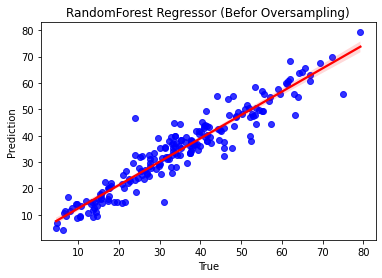

In [ ]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test, y=rf_reg_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('RandomForest Regressor (Befor Oversampling)')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

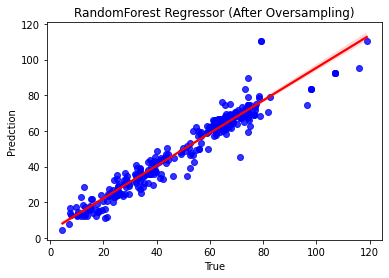

In [ ]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test_res, y=rf_reg_res_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('RandomForest Regressor (After Oversampling)')
plt.xlabel('True')
plt.ylabel('Predction')
plt.show()

### XGB Regressor

In [ ]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

xgb_reg_res = xgb.XGBRegressor()

In [ ]:
xgb_reg.fit(X_train, y_train)
y_pred_test = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

xgb_reg.fit(X_train_res, y_train_res)
y_pred_test_res = xgb_reg.predict(X_test_res)
y_pred_train_res = xgb_reg.predict(X_train_res)

[13:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('R Squared of Train befor Oversampling: {}'.format(r2_score(y_train,y_pred_train)*100))
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,y_pred_test)*100))
print('********************************************************')
print('R Squared of Train after Oversampling: {}'.format(r2_score(y_train_res,y_pred_train_res)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,y_pred_test_res)*100))

R Squared of Train befor Oversampling: 91.71723576329181
R Squared of Test  befor Oversampling: 88.01792178118171
********************************************************
R Squared of Train after Oversampling: 91.30151859654374
R Squared of Test after Oversampling: 89.58250938452214


In [ ]:
xgb_reg.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

parameters= {'booster ':['gbtree','gblinear'],
             'base_score' : [0.5],
             'objective':['reg:squarederror'],
             'validate_parameters':[True],
             'max_depth':[6,7,8,9,11,13,15],
             'learning_rate':[0.01,0.03,0.1,0.3],
             'n_estimators':[100,200,300],
             'reg_alpha':[0,1,2,3],
             'reg_lambda':[0,1,2,3],
             'random_state': [42]
            }

rand = RandomizedSearchCV(estimator = xgb_reg,       
                           param_distributions = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)      


rand_res = RandomizedSearchCV(estimator = xgb_reg_res,        
                           param_distributions = parameters,          
                           cv = 5,
                           scoring='r2',                     
                           n_jobs = 1,
                           verbose=0)  


In [ ]:
rand = rand.fit(X_train, y_train)
print("best r2 score befor Oversampleing:" , rand.best_score_ * 100)
rand.best_params_ 

best r2 score befor Oversampleing: 91.2653123231735


{'base_score': 0.5,
 'booster ': 'gblinear',
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 300,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 3,
 'reg_lambda': 2,
 'validate_parameters': True}

In [ ]:
rand_res = rand_res.fit(X_train_res, y_train_res)
print("best r2 score after Oversampleing:" , rand_res.best_score_ * 100)
rand_res.best_params_ 

best r2 score after Oversampleing: 92.33491735821922


{'base_score': 0.5,
 'booster ': 'gblinear',
 'learning_rate': 0.3,
 'max_depth': 11,
 'n_estimators': 300,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 1,
 'reg_lambda': 3,
 'validate_parameters': True}

In [ ]:
xgb_reg = rand.best_estimator_
xgb_reg.fit(X_train, y_train)

XGBRegressor(booster ='gblinear', learning_rate=0.3, max_depth=6,
             n_estimators=300, objective='reg:squarederror', random_state=42,
             reg_alpha=3, reg_lambda=2, validate_parameters=True)

In [ ]:
xgb_reg_res = rand_res.best_estimator_
xgb_reg_res.fit(X_train_res, y_train_res)

XGBRegressor(booster ='gblinear', learning_rate=0.3, max_depth=11,
             n_estimators=300, objective='reg:squarederror', random_state=42,
             reg_alpha=1, reg_lambda=3, validate_parameters=True)

In [ ]:
xgb_reg_results = cross_val_score(estimator = xgb_reg, X = X_train, y = y_train, cv = 5)
xgb_reg_pred = xgb_reg.predict(X_test)

In [ ]:
xgb_reg_results_res = cross_val_score(estimator = xgb_reg_res, X = X_train_res, y = y_train_res, cv = 5)
xgb_reg_res_pred = xgb_reg_res.predict(X_test_res)

In [ ]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (xgb_reg_results.mean()*100.0, xgb_reg_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (xgb_reg_results_res.mean()*100.0, xgb_reg_results_res.std()*100.0))
print('********************************************************')
print('R Squared of Test  befor Oversampling: {}'.format(r2_score(y_test,xgb_reg_pred)*100))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,xgb_reg_res_pred)*100))

Validation score befor Oversampling: 91.26531% (2.21985%)
Validation score after Oversampling: 92.33492% (0.70851%)
********************************************************
R Squared of Test  befor Oversampling: 91.23296278447998
R Squared of Test after Oversampling: 94.31865865988267


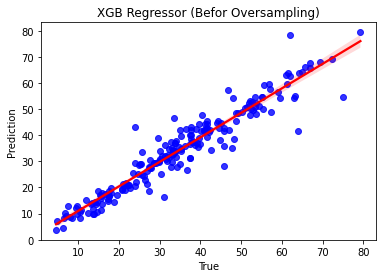

In [ ]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test, y=xgb_reg_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('XGB Regressor (Befor Oversampling)')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

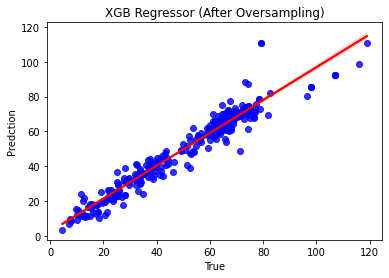

In [ ]:
plt.Figure(figsize=(8,10))
ax = sns.regplot(x=y_test_res, y=xgb_reg_res_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('XGB Regressor (After Oversampling)')
plt.xlabel('True')
plt.ylabel('Predction')
plt.show()

## Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor([('rf',rf_reg),('xgb',xgb_reg)],verbose=True)
voting_reg.fit(X_train,y_train)
voting_reg_results = cross_val_score(estimator = voting_reg, X = X_train, y = y_train, cv = 5)
voting_reg_pred = voting_reg.predict(X_test)

[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.3s
[Voting] ....................... (1 of 2) Processing rf, total=   0.1s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.2s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.2s
[Voting] ....................... (1 of 2) Processing rf, total=   0.1s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.2s
[Voting] ....................... (1 of 2) Processing rf, total=   0.1s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.2s
[Voting] ....................... (1 of 2) Processing rf, total=   0.2s
[Voting] ...................... (2 of 2) Processing xgb, total=   0.2s


In [ ]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (voting_reg_results.mean()*100.0, voting_reg_results.std()*100.0))
print('R Squared of Test befor Oversampling: {}'.format(r2_score(y_test,voting_reg_pred)*100))


Validation score befor Oversampling: 90.42727% (2.58543%)
R Squared of Test befor Oversampling: 91.609306123904


In [ ]:
voting_reg_res = VotingRegressor([('xgb',xgb_reg),('rf',rf_reg)])
voting_reg_res.fit(X_train_res,y_train_res)
voting_reg_results_res = cross_val_score(estimator = voting_reg_res, X = X_train_res, y = y_train_res, cv = 5)
voting_reg_pred_res = voting_reg_res.predict(X_test_res)

In [ ]:
print("Validation score befor Oversampling: %.5f%% (%.5f%%)" % (voting_reg_results_res.mean()*100.0, voting_reg_results_res.std()*100.0))
print('R Squared of Test after Oversampling: {}'.format(r2_score(y_test_res,voting_reg_pred_res)*100))


Validation score befor Oversampling: 92.57355% (0.47914%)
R Squared of Test after Oversampling: 94.21424385115141


In [ ]:
rf = r2_score(y_test_res,rf_reg_res_pred)*100
xgb = r2_score(y_test_res,xgb_reg_res_pred)*100
voting = r2_score(y_test_res,voting_reg_pred_res)*100
scores = [rf,xgb,voting]
labels = ['Random Forest Regressor', 'XGB Regressor','Voting Regressor']
accs = {'R2 Score': scores}
df = pd.DataFrame(accs,index=labels)
df

,R2 Score
Random Forest Regressor,93.516628
XGB Regressor,94.318659
Voting Regressor,94.214244
